# Capstone Project - The Battle of Neighborhoods (Week 1)
#### Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.
#### Problem
Population of City of Toronto is rising every year, which brings more requirements on the city services, as well as the medical services. This report uses Foursquare location data, and Toront census data to determine which neighbourhood need the medical center the most. 
#### Target Audience
This report can provide City of Toronto a clear view to make a decision to select a location of a new medical center.
#### Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data.
#### Data Set
* First, get Toronto neighbourhoods Postal Codes from [Wikipedia](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) , and get the neighbourhood longitude & latitude data from geocoder. Combine these two dataframe to get the neighbourhood location dataframe.
* Second, get Toronto neighbourhoods population (2011 census) from [City of Toronto](https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/neighbourhood-profiles/)
* At last, get vendue info from Foursquare for the neighbourhoods North York and Downtown Toronto


In [1]:
!pip install geocoder

     |████████████████████████████████| 102kB 8.3MB/s ta 0:00:011


In [2]:
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

In [3]:
!conda install -c conda-forge folium=0.5.0

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.1-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


folium-0.5.0         | 45 KB     | ##################################### | 1

In [4]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
from bs4 import BeautifulSoup

# get Toronto Postal Codes
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

soup = BeautifulSoup(source, 'lxml')

table = soup.find_all('table')[0]
table_rows = table.find_all('tr')
res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)
neighbourhoods = pd.DataFrame(res, columns=["Postal Code", "Borough", "Neighbourhood"])

noBorough = neighbourhoods[neighbourhoods['Borough'] == 'Not assigned' ].index
# Delete these row indexes from dataFrame
neighbourhoods.drop(noBorough , inplace=True)

neighbourhoods = neighbourhoods.groupby(['Postal Code', 'Borough'])['Neighbourhood'].apply(lambda x: ','.join(x)).reset_index()

neighbourhoods.head()


,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [5]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [6]:
# add latitude, longitude to the neighbourhoods dataset
neighbourhoods = neighbourhoods.merge(geo,on='Postal Code')
neighbourhoods.head(10)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [7]:
# Find all Medical Centers in Toronto
def getNearbyMedicalCenter(name, latitudes, longitudes, radius=500):
    CLIENT_ID = 'UZF51JLJCNRPSCTOVICJLC2ZNH4QBLHAXAUDDKCFA4ZYXFA4' # your Foursquare ID
    CLIENT_SECRET = 'IZULKGFRHMY4K451Z3HJAYGUZGUZETCLSB0RGY3P4I0DUFTH' # your Foursquare Secret
    VERSION = '20200810' # Foursquare API version
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 500 # define radius
    categoryId='4bf58dd8d48988d104941735'


    venues_list=[]
    for name, lat, lng in zip(name, latitudes, longitudes):
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryId)

       #results = requests.get(url).json()["response"]['groups'][0]['items']
        results = requests.get(url).json()
        results = results['response']['groups'][0]['items']
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_mc = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_mc.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_mc)
#nearby_venues.head()
toronto_mc = getNearbyMedicalCenter(name=neighbourhoods['Neighbourhood'],
                                   latitudes=neighbourhoods['Latitude'],
                                   longitudes=neighbourhoods['Longitude']
                                  )
toronto_mc = toronto_mc.merge(neighbourhoods,on='Neighbourhood')
toronto_mc.head(10)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Postal Code,Borough,Latitude,Longitude
0,"Malvern, Rouge",43.806686,-79.194353,Extendicare Rouge Valley,43.803974,-79.189386,Medical Center,M1B,Scarborough,43.806686,-79.194353
1,"Guildwood, Morningside, West Hill",43.763573,-79.188711,CML HealthCare,43.762568,-79.191970,Medical Center,M1E,Scarborough,43.763573,-79.188711
2,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Woburn Medical Centre,43.766631,-79.192286,Medical Center,M1E,Scarborough,43.763573,-79.188711
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Life Labs,43.766802,-79.192486,Medical Lab,M1E,Scarborough,43.763573,-79.188711
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Simply Align Rehabilitation,43.766634,-79.192275,Chiropractor,M1E,Scarborough,43.763573,-79.188711
5,Cedarbrae,43.773136,-79.239476,physiomed,43.774745,-79.240938,Medical Center,M1H,Scarborough,43.773136,-79.239476
6,Cedarbrae,43.773136,-79.239476,Physiomed Scarborough - Ellesmere,43.775003,-79.240841,Medical Center,M1H,Scarborough,43.773136,-79.239476
7,Cedarbrae,43.773136,-79.239476,Maple Clinic,43.774840,-79.240644,Doctor's Office,M1H,Scarborough,43.773136,-79.239476
8,Cedarbrae,43.773136,-79.239476,Dr. Meneses Health Clinic,43.774960,-79.240851,Doctor's Office,M1H,Scarborough,43.773136,-79.239476
9,Cedarbrae,43.773136,-79.239476,ACTIVE CARE CHIROPRACTIC CLINIC,43.775038,-79.240834,Chiropractor,M1H,Scarborough,43.773136,-79.239476


#### The analystic is based on the above datasets, details will be presented on the week2 project as a final report.
## Week 2
### Results, Decision, and Conclusion Sections


In [8]:
!conda install -c conda-forge geopandas

Solving environment: | ^C
\ 

In [9]:
!pip install geopandas matplotlib
!pip install shapely==1.7.1
!pip install geopandas==0.2.1
!pip install geojsonio==0.0.3

     |████████████████████████████████| 972kB 6.9MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 34.3MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 35.5MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 24.3MB/s eta 0:00:01
     |████████████████████████████████| 204kB 8.7MB/s eta 0:00:01
  Found existing installation: geopandas 0.8.1
    Uninstalling geopandas-0.8.1:
      Successfully uninstalled geopandas-0.8.1
     |████████████████████████████████| 153kB 9.7MB/s eta 0:00:01
     |████████████████████████████████| 81kB 18.3MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/a9/ef/7c/7bbf228825e8717adaa84cd4b6c4ed8649b7958dd2bac45076
Successfully built geojsonio


In [28]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

toronto_mc.columns = list(map(str, toronto_mc.columns))

grouped=toronto_mc.groupby(['Borough']).count()
grouped.rename(columns={'Venue':'Count'}, inplace=True)
grouped.reset_index(inplace=True)
grouped=grouped[['Borough','Count']]
grouped.head(10)


,Borough,Count
0,Central Toronto,36
1,Downtown Toronto,416
2,East Toronto,26
3,East York,17
4,Etobicoke,35
5,Mississauga,2
6,North York,99
7,Scarborough,43
8,West Toronto,27
9,York,10


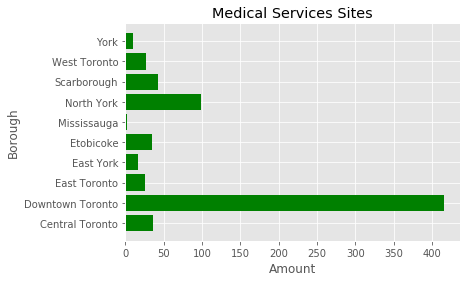

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = grouped['Borough']
y = grouped['Count']

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, y, color='green')
plt.xlabel("Amount")
plt.ylabel("Borough")
plt.title("Medical Services Sites")

plt.yticks(x_pos, x)

plt.show()


In [59]:
# Read Toronto population census data
body = client_12b018f0642e491c90facbc36fbc674c.get_object(Bucket='battleofneighborhoods-donotdelete-pr-dikxaeff6vkapn',Key='Toronto_Borough_Population_2011.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

pop = pd.read_csv(body)
pop.head()


,Borough,Population
0,Downtown Toronto,624910
1,North York,621068
2,Etobicoke,175647
3,Scarborough,600715
4,Central Toronto,181735


In [61]:
# Merge population dataset into the grouped table

pop_med= grouped.merge(pop,on='Borough')
pop_med.head(10)

,index,Borough,Count,Population
0,0,Central Toronto,36,181735
1,1,Downtown Toronto,416,624910
2,2,East Toronto,26,112054
3,4,Etobicoke,35,175647
4,6,North York,99,621068
5,7,Scarborough,43,600715
6,8,West Toronto,27,191735
7,9,York,10,109134


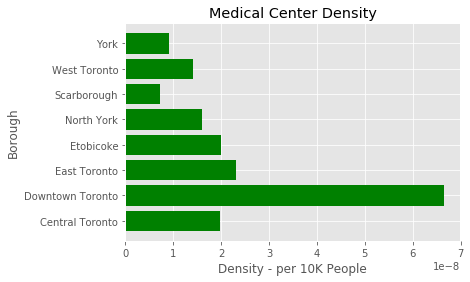

In [68]:
plt.style.use('ggplot')

x = pop_med['Borough']
pop_med['Percentage']=pop_med['Count']/pop_med['Population'].multiply(10000)
y = pop_med['Percentage']

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, y, color='green')
plt.xlabel("Density - per 10K People")
plt.ylabel("Borough")
plt.title("Medical Center Density")

plt.yticks(x_pos, x)

plt.show()

In [77]:
med=pd.DataFrame(toronto_mc,columns=['Neighbourhood','Venue','Venue Category','Latitude','Longitude'])
med.head()

,Neighbourhood,Venue,Venue Category,Latitude,Longitude
0,"Malvern, Rouge",Extendicare Rouge Valley,Medical Center,43.806686,-79.194353
1,"Guildwood, Morningside, West Hill",CML HealthCare,Medical Center,43.763573,-79.188711
2,"Guildwood, Morningside, West Hill",Woburn Medical Centre,Medical Center,43.763573,-79.188711
3,"Guildwood, Morningside, West Hill",Life Labs,Medical Lab,43.763573,-79.188711
4,"Guildwood, Morningside, West Hill",Simply Align Rehabilitation,Chiropractor,43.763573,-79.188711


In [92]:
toronto_map=folium.Map(location=[43.6532, -79.3832],zoom_start=11)
centers=folium.map.FeatureGroup()
for lat,lng, in zip(med.Latitude,med.Longitude):
    centers.add_child(folium.features.CircleMarker(
    [lat,lng],
    radius=5,
    color='white',
    fill=True,
    fill_color='blue',
    fill_opacity=0.6))

toronto_map.add_child(centers)
    

### Results:
The Chart indicates Downtown Toronto has the most medical service sites, North York has the 2nd most sites. Next, let's see based on the population, where do we need to set more medical service sites.
### Conclusion:
Based on the density, when having the capbility to run a medical service site, Scarborough is the Borough where need the services the most.